# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/sample_data/profitData.csv')
print(dataset.tail(10))

    RnD Spend  Administration  Marketing Spend       State    Profit
40   28754.33       118546.05        172795.67  California  78239.91
41   27892.92        84710.77        164470.71     Florida  77798.83
42   23640.93        96189.63        148001.11  California  71498.49
43   15505.73       127382.30         35534.17    New York  69758.98
44   22177.74       154806.14         28334.72  California  65200.33
45    1000.23       124153.04          1903.93    New York  64926.08
46    1315.46       115816.21        297114.46     Florida  49490.75
47        NaN       135426.92              NaN  California  42559.73
48     542.05        51743.15              NaN    New York  35673.41
49        NaN       116983.80         45173.06  California  14681.40


##Taking Care of Missing Data

In [ ]:
dataset['RnD Spend'].fillna(dataset['RnD Spend'].mean(), inplace=True)
dataset['Marketing Spend'].fillna(dataset['Marketing Spend'].mean(), inplace=True)
print(dataset.tail(10))

       RnD Spend  Administration  Marketing Spend       State    Profit
40  28754.330000       118546.05    172795.670000  California  78239.91
41  27892.920000        84710.77    164470.710000     Florida  77798.83
42  23640.930000        96189.63    148001.110000  California  71498.49
43  15505.730000       127382.30     35534.170000    New York  69758.98
44  22177.740000       154806.14     28334.720000  California  65200.33
45   1000.230000       124153.04      1903.930000    New York  64926.08
46   1315.460000       115816.21    297114.460000     Florida  49490.75
47  76793.349583       135426.92    224494.784894  California  42559.73
48    542.050000        51743.15    224494.784894    New York  35673.41
49  76793.349583       116983.80     45173.060000  California  14681.40


##Seperate the Features/Inputs and Target/Output Data

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 224494.78489361703 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Fl

In [4]:
print (y)

NameError: ignored

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 224494.78489361703]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(y_pred)
print(y_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[102388.94 121465.73 127340.58  71709.48 174211.08 121771.65  68393.54
  95588.53 116596.35 162514.07]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


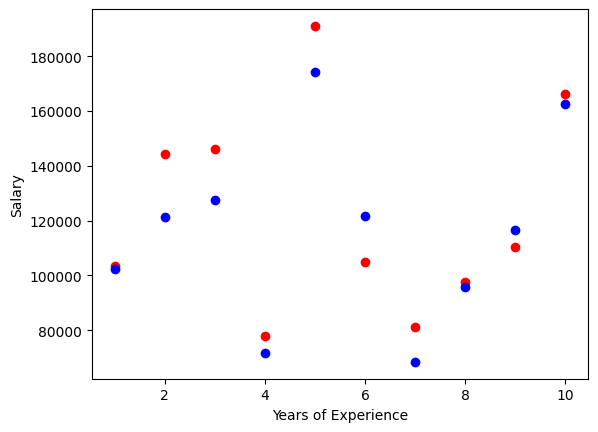

In [ ]:
a=[1,2,3,4,5,6,7,8,9,10]
plt.scatter(a, y_test, color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(a, y_pred, color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()